# Menyiapkan Dataset

In [1]:
import pandas as pd

/Users/gerrylorinanto/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('/Users/gerrylorinanto/Gelo/Gerry/Binar/Platinum Challenge/train_preprocess.tsv.txt', delimiter='\t')

In [3]:
df.columns = ['text','label']

In [4]:
df.head()

,text,label
0,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
1,lokasi strategis di jalan sumatera bandung . t...,positive
2,betapa bahagia nya diri ini saat unboxing pake...,positive
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative
4,"makanan beragam , harga makanan di food stall ...",positive


In [5]:
df.shape

(10999, 2)

In [6]:
df.isna().sum()

text     0
label    0
dtype: int64

In [7]:
df.duplicated().sum()

67

In [8]:
df = df.drop_duplicates()

# Data Preprocessing

In [10]:
df_stopword = pd.read_csv('/Users/gerrylorinanto/Gelo/Gerry/Binar/Platinum Challenge/stopwords_indonesian.csv', encoding = 'latin1')
df_alay = pd.read_csv('/Users/gerrylorinanto/Gelo/Gerry/Binar/Platinum Challenge/new_kamusalay.csv',  encoding = 'latin1')

In [11]:
df_stopword.head()

,Stopword
0,ke
1,menuturkan
2,pernah
3,cukup
4,mengucapkan


In [12]:
df_alay.head()

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin


In [13]:
import re

In [18]:
#cleansing
def preprocess_text(text):
    #Menghapus USER,RT,URL
    text = re.sub(r'USER|\bRT\b|URL',' ',text)
    
    # lower text
    text = text.lower()
    
    #Menghapus /n
    text =  re.sub(r'\\n',' ',text)
    
    # Hapus emotikon dan karakter khusus
    text = re.sub(r'[^\w\d\s]', '', text)

    # mengganti spasi yang berlebihan
    text = re.sub(r'\s+', ' ', text)

    # Menghapus kata dan huruf yang bergabung
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Mengganti kata yang berulang
    text = re.sub(r'\b(\w+)\1\b', r'\1', text)
    return text

#removing stopwords
stopwords = df_stopword['Stopword'].tolist()
def remove_stopwords(text):
    list_stopwords = text.split()
    return ' '.join([text for text in list_stopwords if text not in stopwords])

#normalization
kamus_alay = dict(zip(df_alay['anakjakartaasikasik'], df_alay['anak jakarta asyik asyik']))
def normalize(text):
    for word in kamus_alay:
        return ' '.join([kamus_alay[word] if word in kamus_alay else word for word in text.split(' ')])


In [19]:
def cleansing_text(text):
    text = preprocess_text(text)
    text = remove_stopwords(text)
    text = normalize(text)
    
    return text

In [20]:
df['text_clean'] = df['text'].apply(cleansing_text)

In [21]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [22]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stem_text(tokens):
    return stemmer.stem(tokens)

df['text_clean'] = df['text_clean'].apply(stem_text)
df.to_csv('data_clean.csv',index = False)

In [23]:
import pandas as pd

df = pd.read_csv('data_clean.csv')
df

,text,label,text_clean
0,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus mmbri hujjah partai diwlh su...
1,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra bandung nya nya...
2,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya unboxing paket barang nya b...
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh mahasiswa sombong kasih kartu kuning ajar...
4,"makanan beragam , harga makanan di food stall ...",positive,makan agam harga makan food stall kasir suasan...
...,...,...,...
10927,f - demokrat dorong upaya kemandirian energi n...,neutral,f demokrat dorong upaya mandiri energi nasional
10928,tidak bosan,positive,bosan
10929,enak rasa masakan nya apalagi kepiting yang me...,positive,enak masakan nya kepiting senang pilih kepitin...
10930,"pagi pagi di tol pasteur sudah macet parah , b...",negative,pagi pagi tol pasteur macet parah bikin jengkel


In [24]:
neg = df.loc[df['label'] == 'negative'].text.tolist()
neu = df.loc[df['label'] == 'neutral'].text.tolist()
pos = df.loc[df['label'] == 'positive'].text.tolist()

neg_label = df.loc[df['label'] == 'negative'].label.tolist()
neu_label = df.loc[df['label'] == 'neutral'].label.tolist()
pos_label = df.loc[df['label'] == 'positive'].label.tolist()

total_data = pos + neu + neg
labels = pos_label + neu_label + neg_label

print('Pos: %s, Neu: %s, Neg: %s' % (len(pos), len(neu), len(neg)))
print('Total data: %s' % len(total_data))

Pos: 6382, Neu: 1138, Neg: 3412
Total data: 10932


# Feature Extraction

In [26]:
cleaned_data = total_data

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit(cleaned_data)

X = count_vect.transform(cleaned_data)
print ("Feature Extraction selesai")

Feature Extraction selesai


In [28]:
X.shape

(10932, 17238)

In [29]:
import pickle

pickle.dump(count_vect, open("feature.p", "wb"))

# Split Data

In [30]:
from sklearn.model_selection import train_test_split

classes = labels

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

# Training

In [32]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)

print ("Training selesai")

Training selesai


In [33]:
pickle.dump(model, open("model.p", "wb"))

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

test = model.predict(X_test)

print ("Testing selesai")
print(classification_report(y_test, test))
print(accuracy_score(y_test, test))

Testing selesai
              precision    recall  f1-score   support

    negative       0.82      0.79      0.81       727
     neutral       0.79      0.69      0.73       241
    positive       0.87      0.91      0.89      1219

    accuracy                           0.85      2187
   macro avg       0.83      0.80      0.81      2187
weighted avg       0.84      0.85      0.84      2187

0.8463648834019204


In [44]:
print("Training Score ==> ", model.score(X_train, y_train))
print("Testing Score ==> ", model.score(X_test, y_test))

Training Score ==>  0.9998856489422527
Testing Score ==>  0.8463648834019204


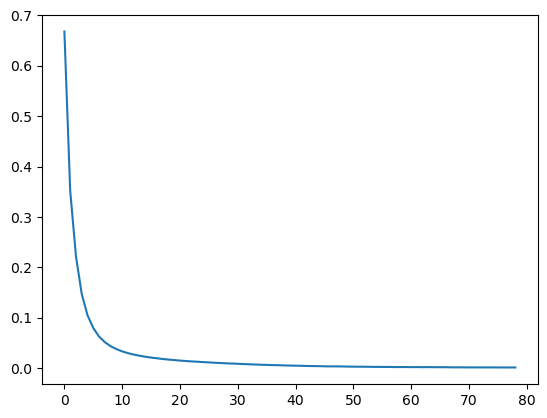

In [41]:
import matplotlib.pyplot as plt

plt.plot(model.loss_curve_)

# Cross Validation

In [45]:
## Cross Validation to check performance ability

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
import pickle

# Load data dan labels
neg = df.loc[df['label'] == 'negative'].text.tolist()
neu = df.loc[df['label'] == 'neutral'].text.tolist()
pos = df.loc[df['label'] == 'positive'].text.tolist()

neg_label = df.loc[df['label'] == 'negative'].label.tolist()
neu_label = df.loc[df['label'] == 'neutral'].label.tolist()
pos_label = df.loc[df['label'] == 'positive'].label.tolist()

total_data = pos + neu + neg
labels = pos_label + neu_label + neg_label

# Feature extraction menggunakan CountVectorizer
count_vect = CountVectorizer()
X = count_vect.fit_transform(total_data)

# Model
model = MLPClassifier()

# Cross-validation
cross_val_scores = cross_val_score(model, X, labels, cv=5)  # Menggunakan 5-fold cross-validation

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Rata-rata Cross-Validation Score:", cross_val_scores.mean())

# Latih model dengan seluruh data pelatihan
model.fit(X, labels)

# Simpan model dan CountVectorizer
pickle.dump(model, open("model.p", "wb"))
pickle.dump(count_vect, open("feature.p", "wb"))


Cross-Validation Scores: [0.83219021 0.83950617 0.83714547 0.8494968  0.8462946 ]
Rata-rata Cross-Validation Score: 0.8409266517486053


# Save Model Dengan Pickle

In [47]:
with open('model_MLP.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("model_MLP Saved!")

model_MLP Saved!


# Predict

In [48]:
original_text =  '''
aku pintar
'''

text = count_vect.transform([cleansing_text(original_text)])

result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

Sentiment:

neutral


In [49]:
original_text =  '''
kamu ga bodoh
'''

text = count_vect.transform([cleansing_text(original_text)])

result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

Sentiment:

negative
